In [1]:
using BioSequences, FASTX, CSV, DataFrames, DataStructures, Distributions, StatsPlots, Plots.Measures

In [2]:
function composition!(targets, c)
    for r in targets, b in r
        inc!(c, b)
    end
    c
end

function beta_diffs(rna_composition, dna_composition)
    bases = sort!(collect(keys(rna_composition)))
    diffs = Float64[]
    prior = 1
    for base in bases
        α1 = rna_composition[base]
        β1 = sum(values(rna_composition)) - α1
        target = Beta(α1 + prior, β1 + prior)
        α2 = dna_composition[DNA(base)]
        β2 = sum(values(dna_composition)) - α2
        nontarget = Beta(α2 + prior, β2 + prior)
        push!(diffs, mean(rand(target, 1000) .- rand(nontarget, 1000)))
    end
    diffs
end

beta_diffs (generic function with 1 method)

In [3]:
species = ["kraussiana", "lepidophylla", "uncinata"]

total_rcounter = counter(RNA)
total_dcounter = counter(DNA)

for sp in species
    rcounter = counter(RNA)
    dcounter = counter(DNA)
    FASTA.Reader(open("Selaginella_$sp.CDS.fasta")) do infile
        for r in infile
            composition!([sequence(LongDNA{4}, r)], dcounter)
        end
    end
    targets = CSV.File("Selaginella_$sp.targets.csv") |> DataFrame
    targets.seq = LongRNA{4}.(targets.seq)
    composition!(targets.seq, rcounter)
    plot(bar(string.(sort!(collect(keys(rcounter)))), beta_diffs(rcounter, dcounter); lw = 0, xticks = :all, legend = false, size = (600, 300), color = [:red,:dodgerblue,:gold3,:springgreen4],
        fontfamily = "Helvetica", yguide = "relative preference", xtickfontsize = 12, xtickfont = "Helvetica Bold", grid = false, framestyle = :zerolines, title = sp))
    savefig("S. $sp.svg")
    merge!(total_rcounter, rcounter)
    merge!(total_dcounter, dcounter)
end


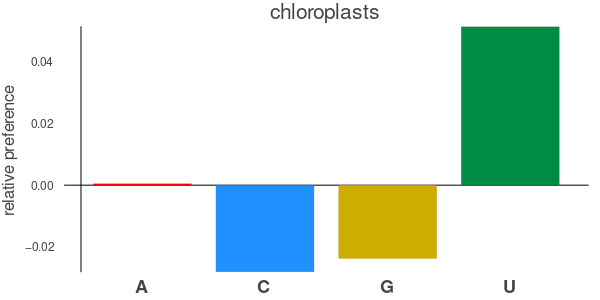

In [4]:

cp_plot = plot(bar(string.(sort!(collect(keys(total_rcounter)))), beta_diffs(total_rcounter, total_dcounter); lw = 0, xticks = :all, legend = false, size = (600, 300), color = [:red,:dodgerblue,:gold3,:springgreen4],
    fontfamily = "Helvetica", yguide = "relative preference", xtickfontsize = 12, xtickfont = "Helvetica Bold", grid = false, framestyle = :zerolines, title = "chloroplasts"))

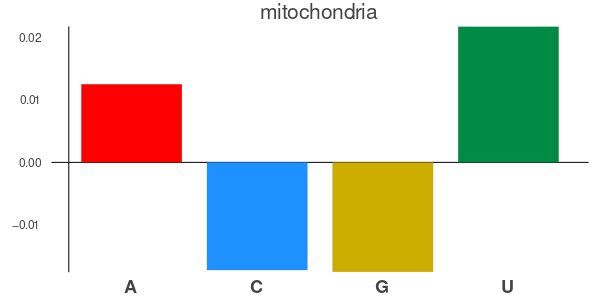

In [5]:
rcounter = counter(RNA)
dcounter = counter(DNA)

FASTA.Reader(open("Selaginella_moellendorfii.CDS.fasta")) do infile
    for r in infile
        composition!([sequence(LongDNA{4}, r)], dcounter)
    end
end
targets = CSV.File("Selaginella_moellendorfii.targets.csv") |> DataFrame
targets.seq = LongRNA{4}.(targets.seq)
composition!(targets.seq, rcounter)

mt_plot = plot(bar(string.(sort!(collect(keys(rcounter)))), beta_diffs(rcounter, dcounter); lw = 0, xticks = :all, legend = false, size = (600, 300), color = [:red,:dodgerblue,:gold3,:springgreen4],
    fontfamily = "Helvetica", xtickfontsize = 12, xtickfont = "Helvetica Bold", grid = false, framestyle = :zerolines, title = "mitochondria"))

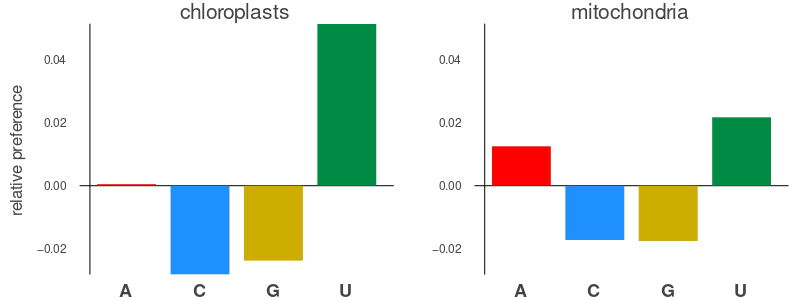

In [6]:
plot(cp_plot, mt_plot; layout = (1,2), size = (800, 300), link = :y, left_margin = 5mm)

In [7]:
savefig("Selaginella_target_composition.svg")

"/Users/ian/github/GRASP/composition/selaginella/Selaginella_target_composition.svg"